In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Check openai version, which should > 1.1: pip show openai
import os
import openai

# Construct the game

## Levels

In [2]:
# Parsing level from string format to a 2D numpy array
def parse_level(level_str):
    rows = level_str.strip().split('\n')
    return np.array([list(row.split(',')) for row in rows])

wall_test_str = '''
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,A,-,-,-,-,-,-,-,-,G,-
x,x,-,x,x,x,x,x,x,x,x,x
'''
wall_test = parse_level(wall_test_str)

jump_over_test_str = '''
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,B,x,-,-,-,-,-,-,A,G,-
x,x,x,x,x,x,x,x,x,x,x,x
'''
jump_over_test = parse_level(jump_over_test_str)

level_0_str = '''
-,-,-,-,-,x,-,-,-,-,-,-
-,-,-,-,-,x,-,-,-,-,-,-
-,-,-,-,-,x,-,-,-,-,-,-
-,-,-,-,-,x,-,-,-,-,-,-
-,-,-,-,-,x,-,-,-,-,-,-
-,-,-,-,-,x,-,-,-,-,-,-
-,-,-,-,-,x,-,-,-,-,-,-
-,-,-,-,-,x,-,-,-,-,-,-
x,-,-,-,-,x,-,-,-,-,-,x
x,-,-,-,-,x,-,-,-,-,-,x
x,A,B,k,-,&,-,-,-,-,G,x
x,x,x,x,x,x,x,x,x,x,x,x
'''

level_0 = parse_level(level_0_str)

level_1_str = '''
-,-,-,-,-,-,-,-,x,-,-,-
-,-,-,-,-,-,-,-,x,-,-,-
-,-,-,-,-,-,-,-,x,-,-,-
-,-,-,-,-,-,-,-,x,-,-,-
-,-,-,-,-,-,-,-,x,-,-,-
-,-,-,-,-,-,-,-,x,-,-,-
-,-,-,-,-,-,-,-,x,-,-,-
-,-,-,-,-,-,-,-,x,-,-,-
-,-,-,-,-,k,-,-,x,-,-,-
-,-,-,-,-,x,-,-,x,-,-,-
-,A,B,-,-,-,-,-,&,-,G,-
x,x,x,x,x,x,x,x,x,x,x,x
'''

level_1 = parse_level(level_1_str)

level_2_str = '''
-,-,v,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
k,-,z,-,A,-,B,n,-,-,&,G
x,x,x,x,x,x,x,x,x,x,x,x
'''

level_2 = parse_level(level_2_str)

level_3_str = '''
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
k,-,^,-,A,-,B,n,-,-,&,G
x,x,x,x,x,x,x,x,x,x,x,x
'''

level_3 = parse_level(level_3_str)

level_4_str = '''
-,-,-,-,z,-,-,-,-,-,x,-
-,-,-,-,z,-,-,-,-,-,x,-
-,-,-,-,z,-,-,-,-,-,x,-
-,-,-,-,z,-,-,-,-,-,x,-
-,-,-,-,z,-,-,-,-,-,x,-
-,-,-,-,z,-,-,-,-,-,x,-
-,-,-,-,z,-,-,-,-,-,x,-
-,-,-,-,z,-,-,-,-,-,x,-
k,-,-,-,z,-,-,-,-,-,x,-
x,-,-,-,z,-,-,-,-,-,x,-
-,-,n,-,^,A,B,-,n,-,&,G
x,x,x,x,x,x,x,x,x,x,x,x
'''

level_4 = parse_level(level_4_str)

level_5_str = '''
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,x,-
A,B,-,k,-,k,-,k,-,&,x,G
x,x,x,x,x,x,x,x,x,x,x,x
'''

level_5 = parse_level(level_5_str)

level_6_str = '''
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,v,-,-,x,-,-,v,-,-,-
A,B,z,-,n,x,-,-,z,-,n,G
x,x,x,x,x,x,x,x,x,x,x,x
'''

level_6 = parse_level(level_6_str)

level_7_str = '''
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,x,-,-,-,-,-,-,-,-,-,-
-,x,x,-,-,-,-,-,-,-,-,-
-,x,x,x,-,-,-,-,-,-,-,-
-,v,v,v,x,-,-,-,-,-,-,-
k,z,z,z,-,-,A,B,-,n,-,G
x,x,x,x,x,x,x,x,x,x,x,x
'''

level_7 = parse_level(level_7_str)

level_8_str = '''
-,-,v,-,-,-,-,-,v,-,x,-
-,-,z,-,-,-,-,-,z,-,x,-
-,-,z,-,-,-,-,-,z,-,x,-
-,-,z,-,-,-,-,-,z,-,x,-
-,-,z,-,-,-,-,-,z,-,x,-
-,-,z,-,-,-,-,-,z,-,x,-
-,-,z,-,-,-,-,-,z,-,x,-
-,-,z,-,-,-,-,-,z,-,x,-
-,-,z,-,-,-,-,-,z,-,x,-
-,-,z,-,-,-,-,-,z,-,&,-
G,k,z,n,A,-,-,B,z,n,x,G
x,x,x,x,x,-,-,x,x,x,x,x
'''

level_8 = parse_level(level_8_str)

level_9_str = '''
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,G
x,x,x,x,x,x,x,x,x,-,-,x
-,-,-,-,v,-,-,-,-,-,&,x
A,-,n,-,z,-,n,-,-,x,-,-
x,x,x,x,x,x,x,x,x,x,x,x
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,G
x,x,x,x,x,x,x,x,-,-,-,x
-,v,-,-,-,v,-,-,-,-,x,-
B,z,-,n,-,z,-,k,-,x,x,-
x,x,x,x,x,x,x,x,x,x,x,x
'''

level_9 = parse_level(level_9_str)

level_10_str = '''
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,x,-,-,-,-,-,-,-,-
-,-,x,x,-,x,x,-,-,-,-,-
k,x,x,x,-,x,x,x,-,-,-,-
x,x,x,x,&,x,x,x,x,-,-,-
x,x,x,x,G,x,x,x,x,x,A,B
x,x,x,x,x,x,x,x,x,x,x,x
'''

level_10 = parse_level(level_10_str)

## Render

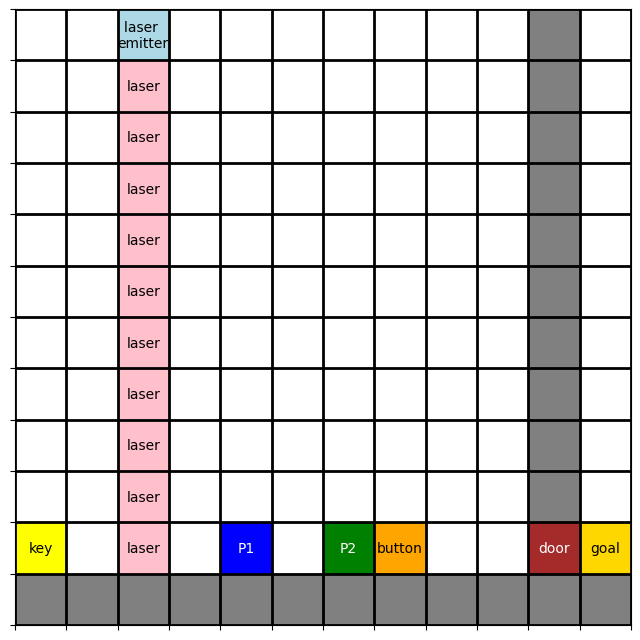

In [3]:
import matplotlib.colors as mcolors

def display_level_with_labels(level_data, idx=0):
    # Color mapping for each tile
    color_map = {
        '-': 'white',
        'x': 'gray',
        'A': 'blue',
        'B': 'green',
        'C': 'red',
        'D': 'purple',
        'k': 'yellow',
        'n': 'orange',
        'u': 'cyan',
        '&': 'brown',
        'z': 'pink',
        'v': 'lightblue',
        '^': 'lightgreen',
        'G': 'gold'
    }

    # Label mapping for each tile
    label_map = {
        '-': '',
        'x': '',
        'A': 'P1',
        'B': 'P2',
        'C': 'P3',
        'D': 'P4',
        'k': 'key',
        'n': 'button',
        'u': 'button',
        '&': 'door',
        'z': 'laser',
        'v': 'laser \nemitter',
        '^': 'laser \nemitter',
        'G': 'goal'
    }

    # Convert tile symbols to RGB values using color map
    rows, cols = level_data.shape
    color_data = np.zeros((rows, cols, 4))
    for i in range(rows):
        for j in range(cols):
            color_data[i, j] = mcolors.to_rgba(color_map[level_data[i, j]])

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(color_data)

    # Add labels
    for i in range(rows):
        for j in range(cols):
            label = label_map[level_data[i, j]]
            ax.text(j, i, label, ha='center', va='center', color='black' if level_data[i, j] in ['-', 'k', 'G', 'u', 'n', 'z', 'v', '^'] else 'white')

    ax.set_xticks(np.arange(-0.5, 12, 1))
    ax.set_yticks(np.arange(-0.5, 12, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(which='both', color='black', linewidth=2)
    ax.set_aspect('equal')

    plt.show()

display_level_with_labels(level_2)

In [4]:
def print_to_string(level):
    level_string = ''
    for row in level:
      level_string = level_string + ','.join(row) + '\n'
    return level_string

## Engine

In [5]:
def move_player(level_data, x, y, dx, dy):
    '''Move a player in the level_data by dx and dy if possible.'''
    player_symbol = level_data[x, y]
    new_x, new_y = x + dx, y + dy
    target_cell = level_data[new_x, new_y]

    if target_cell not in ['x', '&', 'v', '^', 'A', 'B', 'C', 'D', 'n', 'u']:  # fail if not solid

        if target_cell == 'k':  # key logic
            level_data[level_data == '&'] = '-'  # Open all doors
            level_data[new_x, new_y] = player_symbol
            level_data[x, y] = '-'

        elif target_cell == 'G':  # goal logic
            level_data[x, y] = '-'

        else:
            level_data[x, y], level_data[new_x, new_y] = '-', player_symbol

def jump_over(level_data, x, y, direction):
    offset = -1 if direction == 'left' else 1

    # Check if the jump is within bounds
    if not (0 <= x - 1 < 12) or not (0 <= y + 2*offset < 12):
        return (0, 0)

    # Check for laser at one up and one to the direction
    if level_data[x-1, y+offset] == 'z':
        return (None, None)

    # Check if one up and one to the direction is blocked by a non-laser
    if level_data[x-1, y+offset] in ['x', 'v', '^', '&', 'A', 'B', 'C', 'D']:
        return (0, 0)

    # Check if two to the direction and one up is blocked
    if level_data[x-1, y+2*offset] in ['x', 'v', '^', '&', 'A', 'B', 'C', 'D', 'z']:
        return (-1, offset)

    # If both checks pass, move two to the direction
    return (0, 2*offset)

def handle_player_action(level_data, player, action):
    x, y = np.where(level_data == player)
    if len(x) == 0:
        return level_data
    x, y = x[0], y[0]

    moves = {
        'move left': (0, -1),
        'move right': (0, 1),
        'jump on left': (-1, -1),
        'jump on right': (-1, 1),
        'jump over left': jump_over(level_data, x, y, 'left'),
        'jump over right': jump_over(level_data, x, y, 'right')
    }

    dx, dy = moves.get(action, (0, 0))
    if dx is None:
      level_data[x, y] = '-'
      return level_data

    if 0 <= x + dx < 12 and 0 <= y + dy < 12:  # Ensure within bounds
        move_player(level_data, x, y, dx, dy)

    return level_data

def apply_gravity(updated_data):
    players = ['A', 'B', 'C', 'D']

    for _ in range(11):
        for i in range(11, 0, -1):
            for j in range(12):
                cell = updated_data[i-1, j]
                if cell in players and updated_data[i, j] == '-':
                    updated_data[i-1, j], updated_data[i, j] = updated_data[i, j], updated_data[i-1, j]

    # Remove players if they fall into the bottom row
    for j in range(12):
        if updated_data[11, j] in players:
            updated_data[11, j] = '-'

    return updated_data

# Todo: move into apply interactions
def apply_button_interactions(updated_data):
    players = ['A', 'B', 'C', 'D']

    # Button Activation/Deactivation
    for i in range(11):
        for j in range(12):
            if updated_data[i, j] in players and updated_data[i+1, j] == 'n':
                updated_data[i+1, j] = 'u'
            elif updated_data[i, j] == '-' and updated_data[i+1, j] == 'u':
                updated_data[i+1, j] = 'n'

    # Laser Activation/Deactivation
    if 'u' in updated_data:  # If any button is activated
        updated_data[updated_data == 'z'] = '-'
    else:  # No button is activated
        for j in range(12):
            laser_active = False
            for i in range(12):
                if updated_data[i, j] == 'v':
                    laser_active = True
                elif updated_data[i, j] == '^':
                    laser_active = False
                elif laser_active and updated_data[i, j] not in ['x', '&', 'n', 'u', 'k', 'G']:
                    if updated_data[i, j] in players:
                        updated_data[i, j] = 'z'  # Keep the laser active even if a player was there
                    else:
                        updated_data[i, j] = 'z'

    return updated_data

def apply_actions(level_data, actions):
    updated_data = level_data.copy()
    for player, action in actions.items():
        updated_data = handle_player_action(updated_data, player, action)
    return updated_data

def apply_game_updates(level_data, actions):
    '''Integrate all actions and interactions.'''
    updated_data = apply_actions(level_data, actions)
    updated_data = apply_gravity(updated_data)
    updated_data = apply_button_interactions(updated_data)

    return updated_data


# Demo

In [6]:
def agent_loop(prompt, openai_api_key, level, agent_thoughts, player):
    openai.api_key = openai_api_key
    client = openai.OpenAI(api_key=openai_api_key)

    with open(prompt[0], 'r') as f:
        system_prompt = f.read()
        
    with open(prompt[1], 'r') as f:
        task_prompt = f.read()
    
    response = client.chat.completions.create(
        # model='gpt-3.5-turbo',
        model='gpt-3.5-turbo-1106',
        # model='gpt-4',
        response_format={ 'type': 'json_object' },
        messages=[
            {'role': 'system', 'content': system_prompt.format(player=player)},
            {'role': 'user', 'content': task_prompt.format(level=level,
                                                           thoughts=agent_thoughts,
                                                           player=player)}
        ]
        # temperature=0,
        # max_tokens=1024,
        # top_p=1,
        # frequency_penalty=0,
        # presence_penalty=0
    )

    outcome = response.choices[0].message.content
    return outcome

Before we start, this is how the game looks like. 


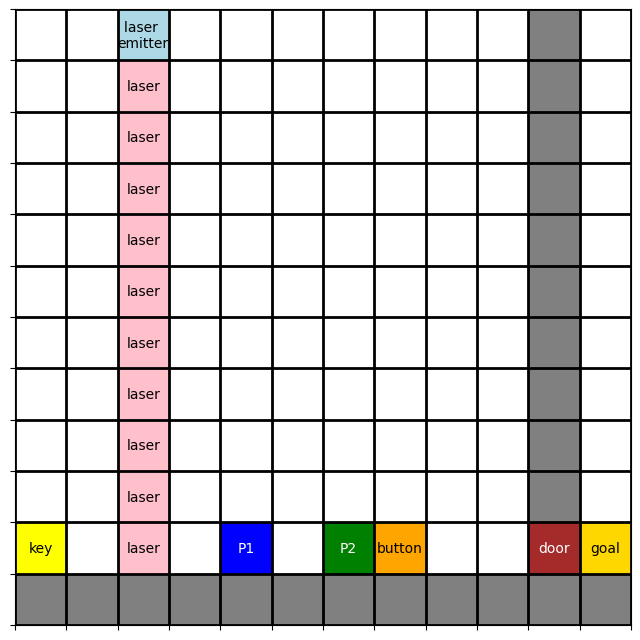

Round: 1, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "jump over right",
  "communication": "I'm going to jump over the laser to reach the button. Once I deactivate the laser, someone should go for the key to unlock the door. Let's coordinate to clear the path to the goal."
} 

After player A take the move, here is how the game looks like: 


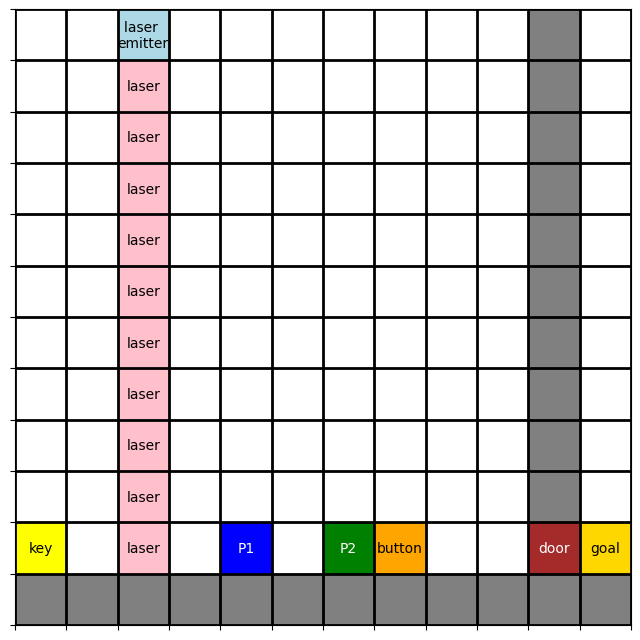

For player B, LLM outcome:

 {
  "move": "jump over right",
  "communication": "I'll jump over the laser to reach the button and deactivate it. Once it's safe, someone should go for the key to unlock the door. Let's coordinate to clear the path to the goal."
} 

After player B take the move, here is how the game looks like: 


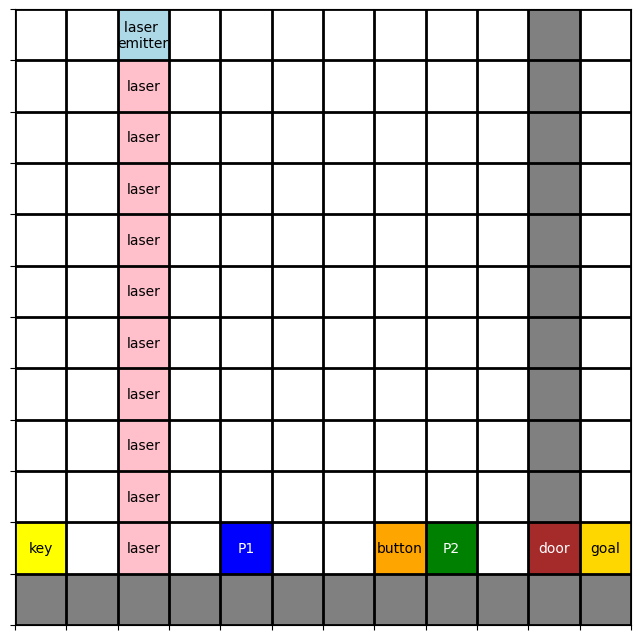

Round: 2, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "jump over right",
  "communication": "Hey team, I am going to jump over to the right to reach the button and deactivate the laser. Once I do that, we will be able to clear the path for everyone. Keep an eye out for the key, we'll need it to open the door later."
} 

After player A take the move, here is how the game looks like: 


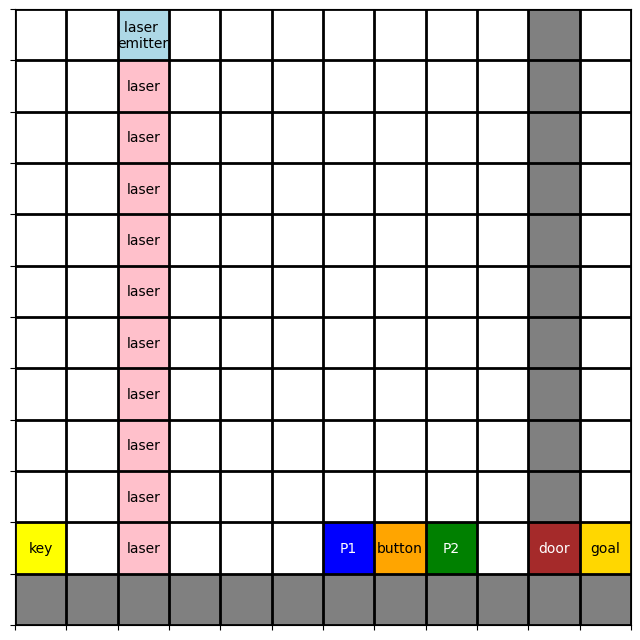

For player B, LLM outcome:

 {
  "move": "move right",
  "communication": "Hey team, I will move to the right to help clear the path. Once the laser is deactivated, we can focus on getting the key to open the door. Let's keep coordinating our moves to reach the goal together!"
} 

After player B take the move, here is how the game looks like: 


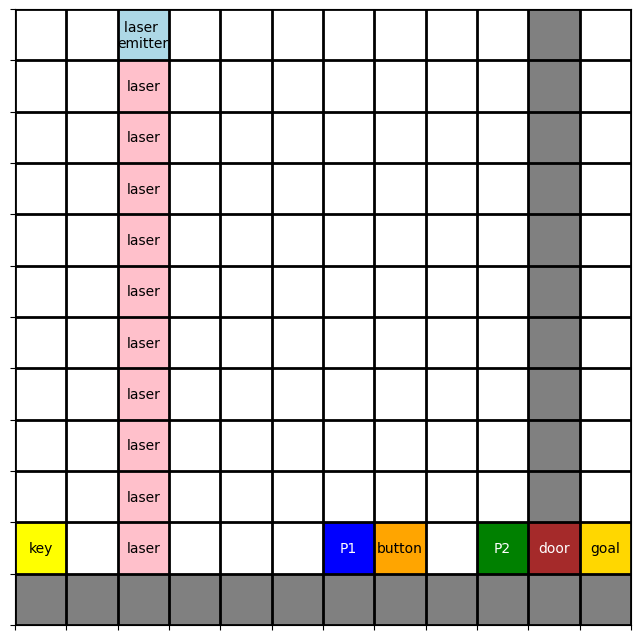

Round: 3, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "jump over right",
  "communication": "I need to jump over the laser to reach the button and deactivate it. Once the laser is off, I can go to the key to unlock the door. Keep an eye out for the other lasers and make sure to move safely!"
} 

After player A take the move, here is how the game looks like: 


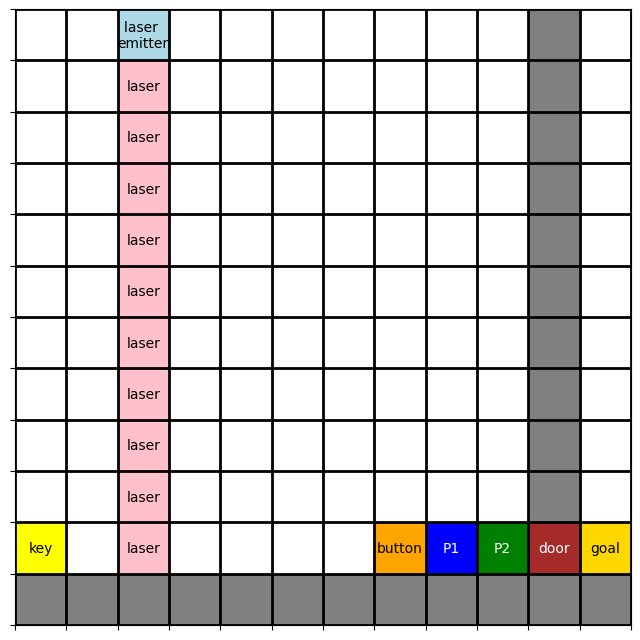

For player B, LLM outcome:

 {
  "move": "jump over right",
  "communication": "I'll jump over the laser to reach the button and deactivate it. Once the laser is off, I'll head towards the key to unlock the door. Keep an eye out for any other obstacles and make sure to move safely on your turns as well!"
} 

After player B take the move, here is how the game looks like: 


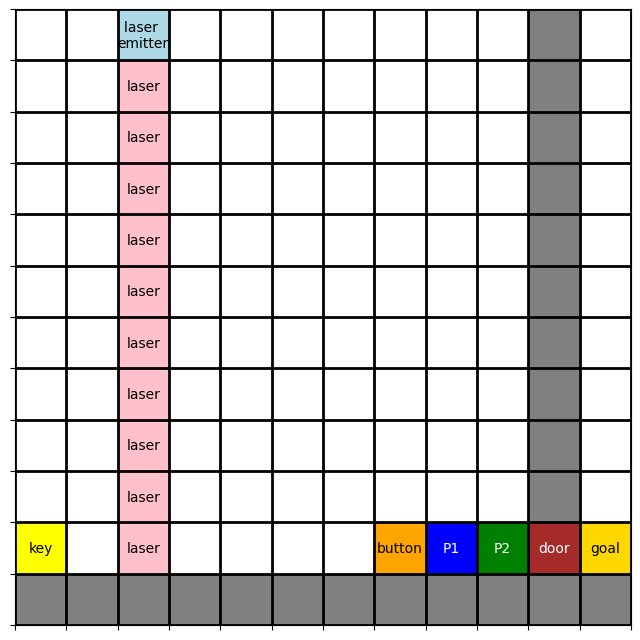

Round: 4, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "right",
  "communication": "I'm going to move right to position myself to jump on the button. Once I deactivate the laser, we can collect the key and unlock the door. Please be ready to move after the laser is deactivated."
} 

After player A take the move, here is how the game looks like: 


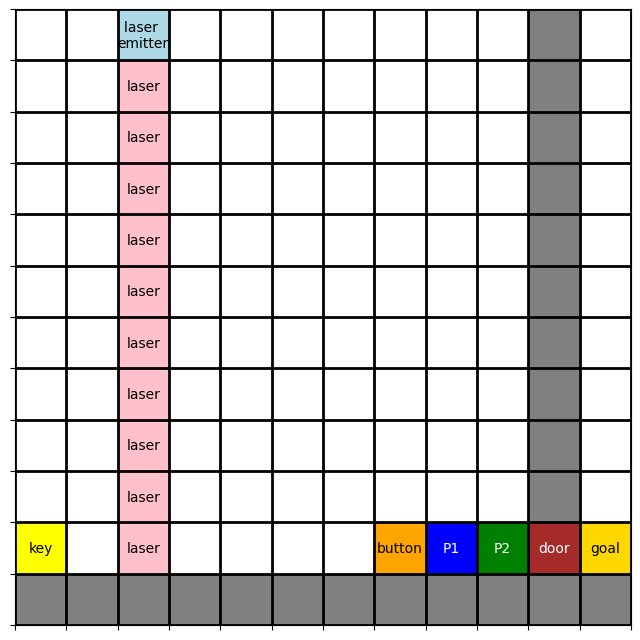

For player B, LLM outcome:

 {
  "move": "jump on right",
  "communication": "I will jump on the right to avoid the laser and position myself to collect the key and unlock the door. Player A, please deactivate the laser and get ready to move. Once the door is unlocked, we can all head towards the goal."
} 

After player B take the move, here is how the game looks like: 


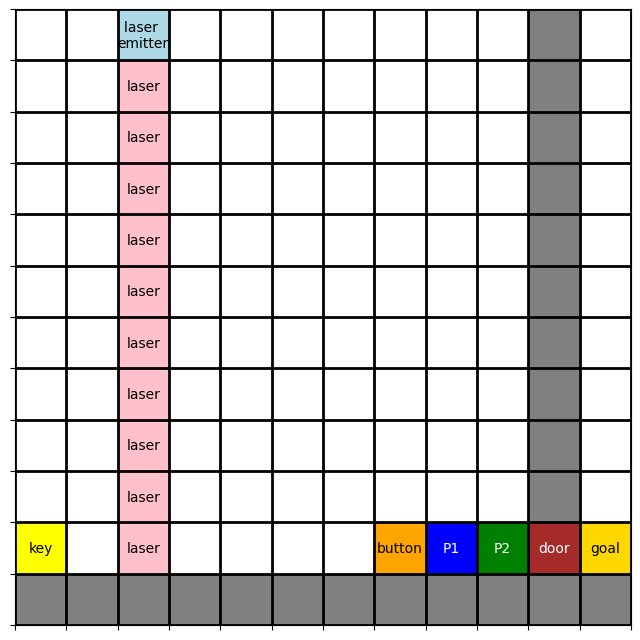

Round: 5, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "jump over right",
  "communication": "I'm going to jump over the laser to reach the button and deactivate it. Once the laser is off, we can collect the key and unlock the door together. Keep an eye out for the key location and the door, and be ready to move once the obstacle is cleared."
} 

After player A take the move, here is how the game looks like: 


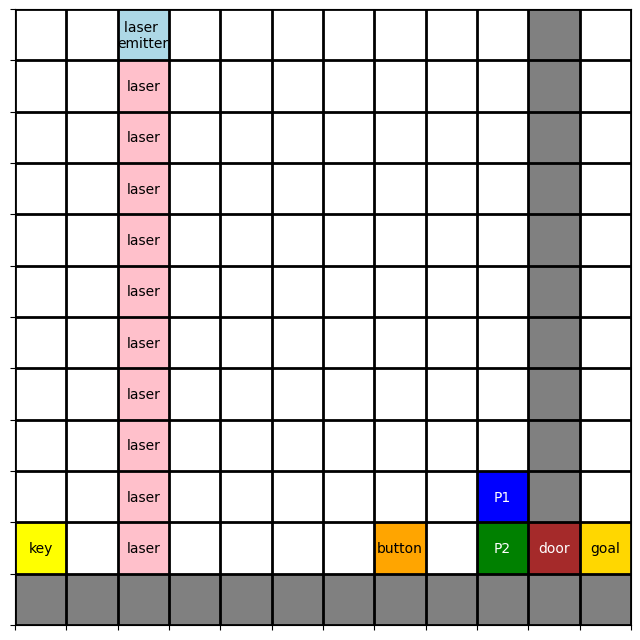

For player B, LLM outcome:

 {
  "move": "jump over right",
  "communication": "I'm going to jump over the laser to reach the button and deactivate it. Once the laser is off, we can collect the key and unlock the door together. Keep an eye out for the key location and the door, and be ready to move once the obstacle is cleared."
} 

After player B take the move, here is how the game looks like: 


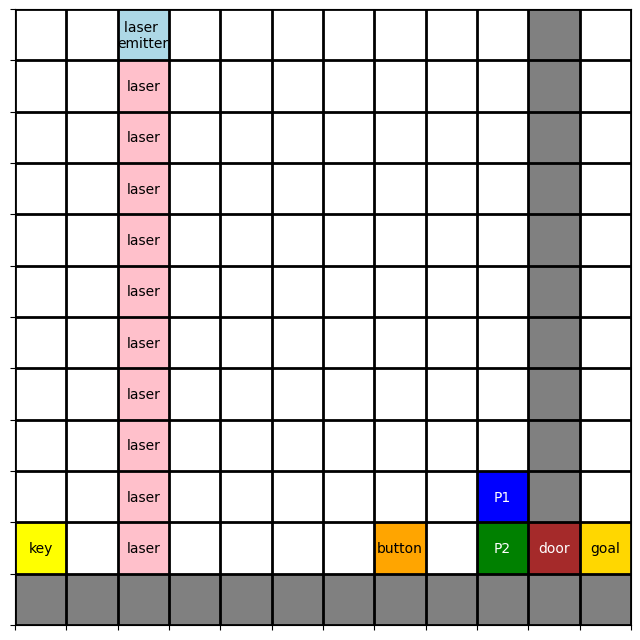

Round: 6, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "jump over left",
  "communication": "Hey team, I'm going to jump over the left side to reach the button. Once I deactivate the laser, we'll be able to proceed. Please keep an eye out for the key to unlock the door." 
} 

After player A take the move, here is how the game looks like: 


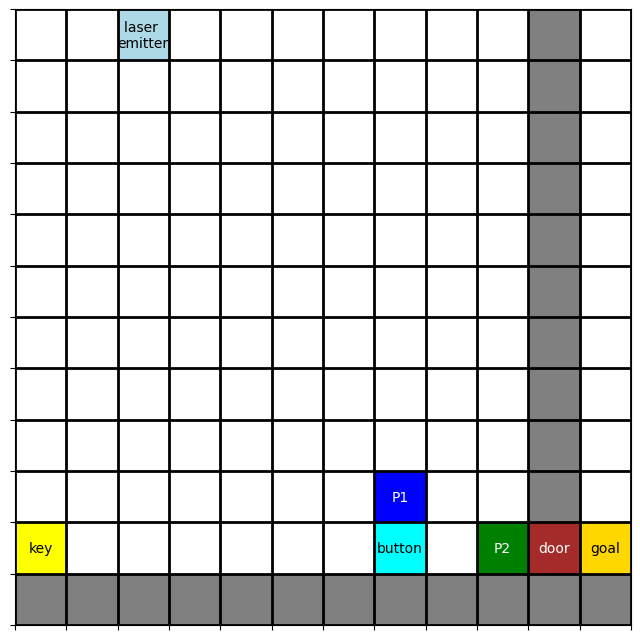

For player B, LLM outcome:

 {
  "move": "move right",
  "communication": "Hey everyone, I'll move to the right to get closer to the button. Once A deactivates the laser, we should focus on finding the key to unlock the door. Let's keep communicating and coordinate our moves to reach the goal together!"
} 

After player B take the move, here is how the game looks like: 


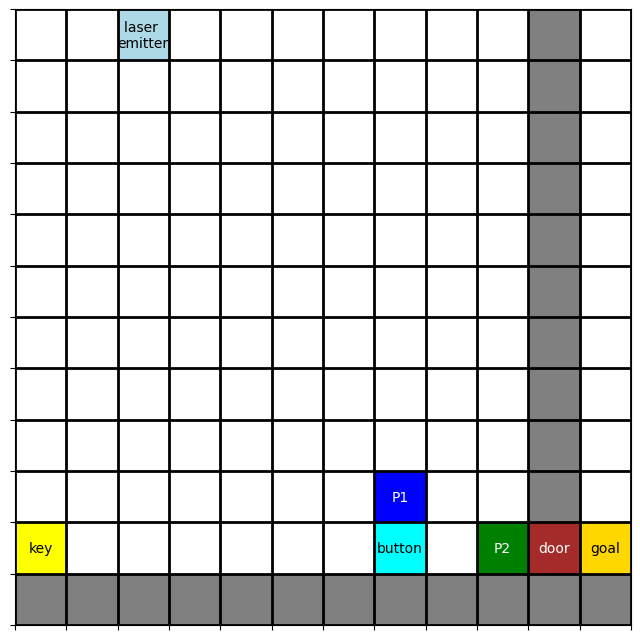

Round: 7, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "jump over right",
  "communication": "Hey team, I'm going to jump over the laser and land on the button to deactivate it. We need to get the key to open the door later. Keep an eye out for any other obstacles in our path to the goal!"
} 

After player A take the move, here is how the game looks like: 


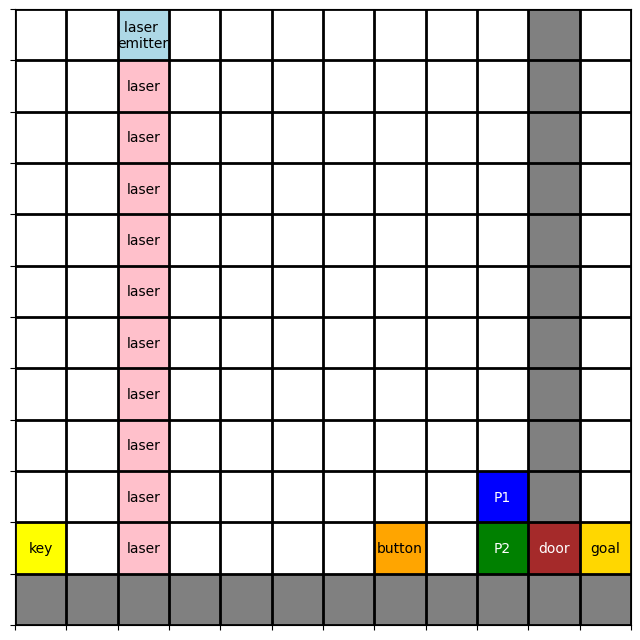

For player B, LLM outcome:

 {
  "move": "jump over right",
  "communication": "I see that the laser is deactivated, and I'm going to jump over it to reach the key. Once we have the key, we can open the door and head towards the goal. Keep an eye out for any other obstacles or important items on the way!"
} 

After player B take the move, here is how the game looks like: 


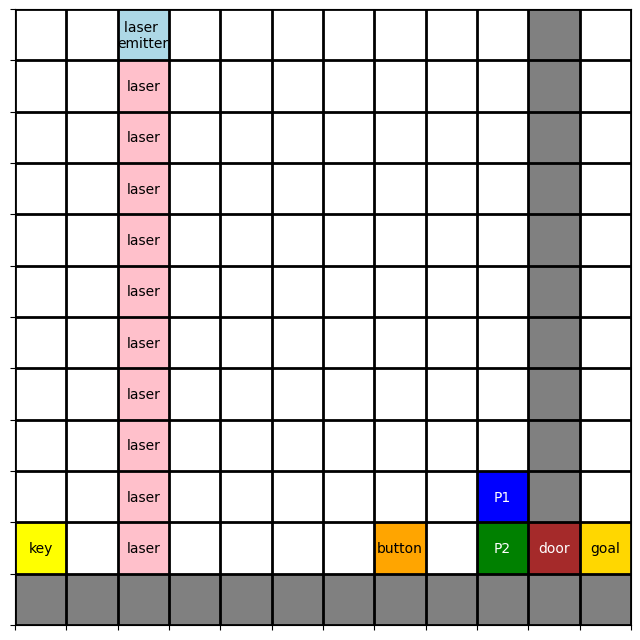

Round: 8, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "jump over right",
  "communication": "I'm going to jump over the laser to reach the button. Once I deactivate the laser, player B can move to the key and unlock the door. Player B, get ready to grab the key and open the door on the next turn."
} 

After player A take the move, here is how the game looks like: 


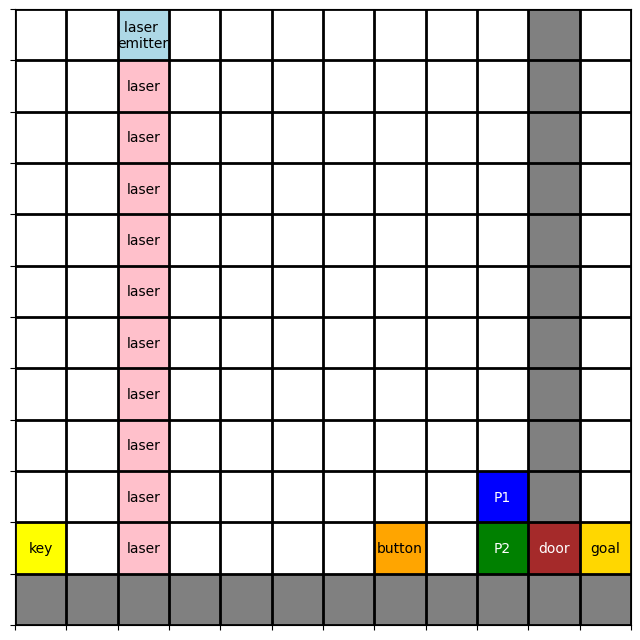

For player B, LLM outcome:

 {
  "move": "jump over right",
  "communication": "Player A, I'm making the move to jump over the laser and head towards the key. Once I have the key, I'll unlock the door to clear the path for all of us to reach the goal. Get ready to make your move once the door is open!"
} 

After player B take the move, here is how the game looks like: 


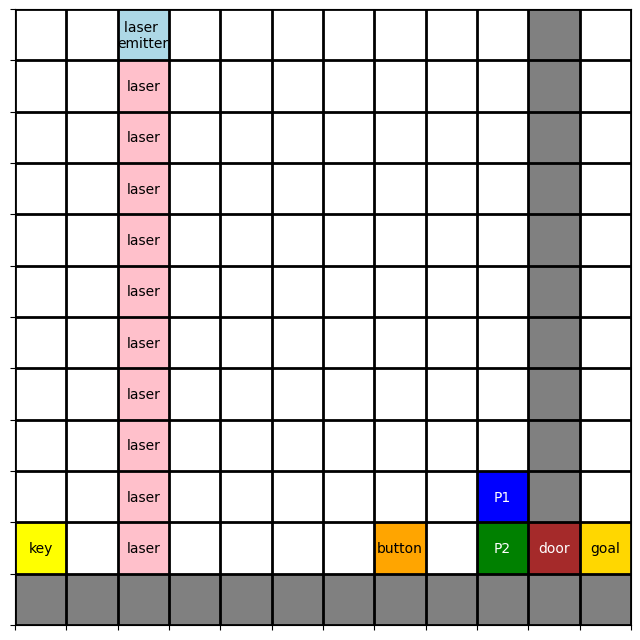

Round: 9, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "jump over right",
  "communication": "Hey team, I'm going to jump over the laser on the right and land on the button. Make sure to deactivate the lasers and head towards the goal. We need to collect the key to unlock the door later. Let's coordinate our moves to clear the path and reach the goal together."
} 

After player A take the move, here is how the game looks like: 


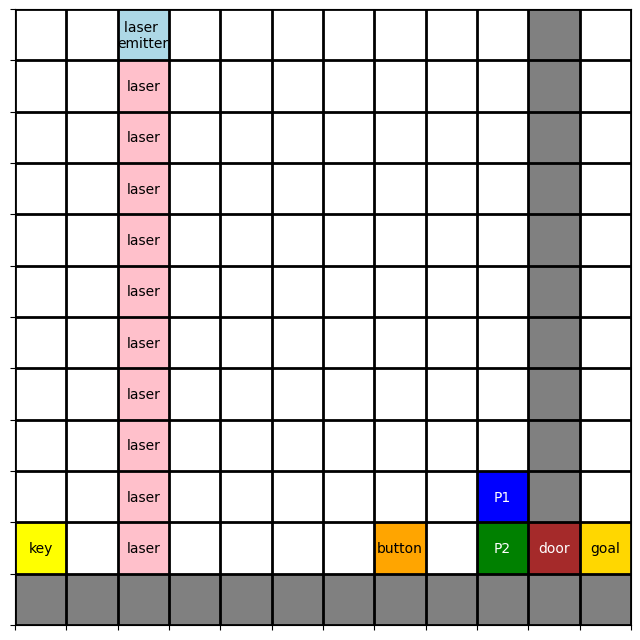

For player B, LLM outcome:

 {
  "move": "jump over right",
  "communication": "Hey team, I'm going to jump over the laser on the right to land on the button and deactivate the lasers. We need to plan our moves carefully to clear the path to the goal. Let's work together to collect the key and unlock the door to advance towards the goal." 
} 

After player B take the move, here is how the game looks like: 


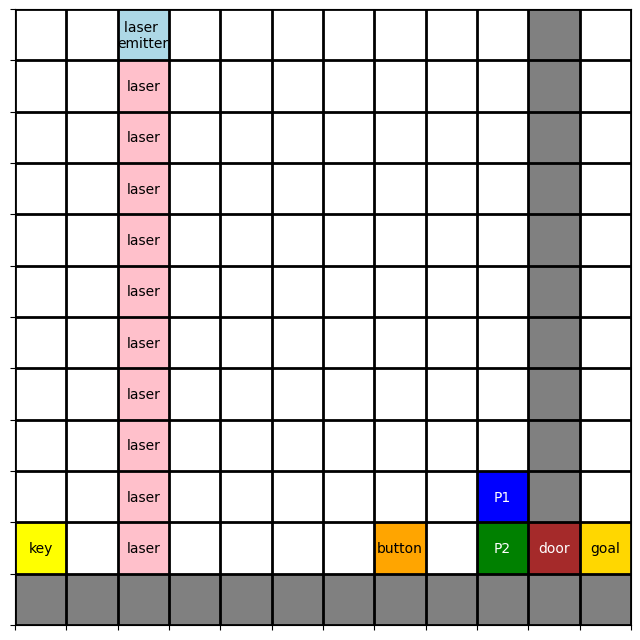

Round: 10, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "jump over right",
  "communication": "Hey guys, I'm going to jump over the laser on the right to deactivate it. Once I do that, we'll need to find the key to unlock the door. Keep an eye out for the key and let's regroup near the door after I deactivate the laser."
} 

After player A take the move, here is how the game looks like: 


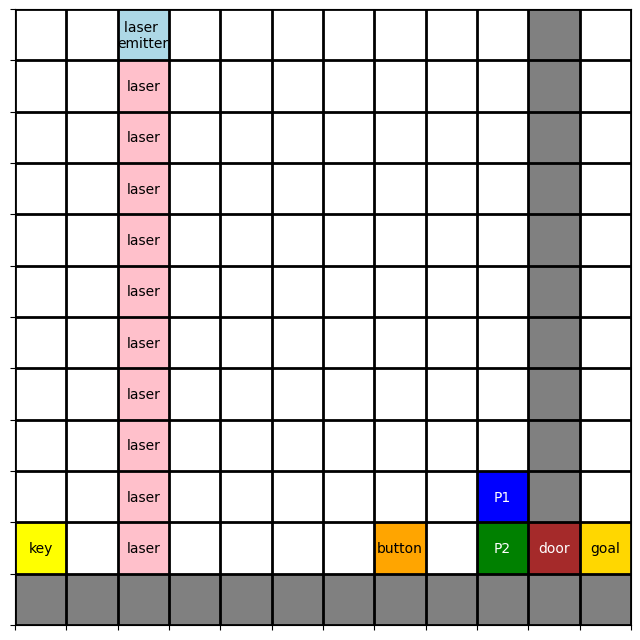

For player B, LLM outcome:

 {
  "move": "move right",
  "communication": "Hey team, I'm going to start by moving towards the door to regroup with you all. Once we're all together, let's search for the key to unlock the door and clear a path to the goal. Stay safe and keep an eye out for any traps!"
} 

After player B take the move, here is how the game looks like: 


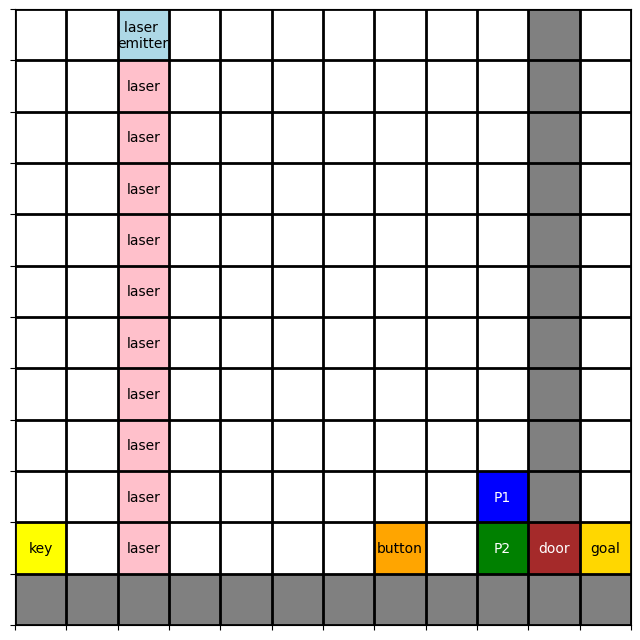

Round: 11, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "jump over right",
  "communication": "A, I'm going to jump over the laser to deactivate it and reach the button. Once the laser is off, we can collect the key and unlock the door. B, get ready to move forward once the door is open. C and D, keep an eye out for any potential dangers and help us navigate through this." 
} 

After player A take the move, here is how the game looks like: 


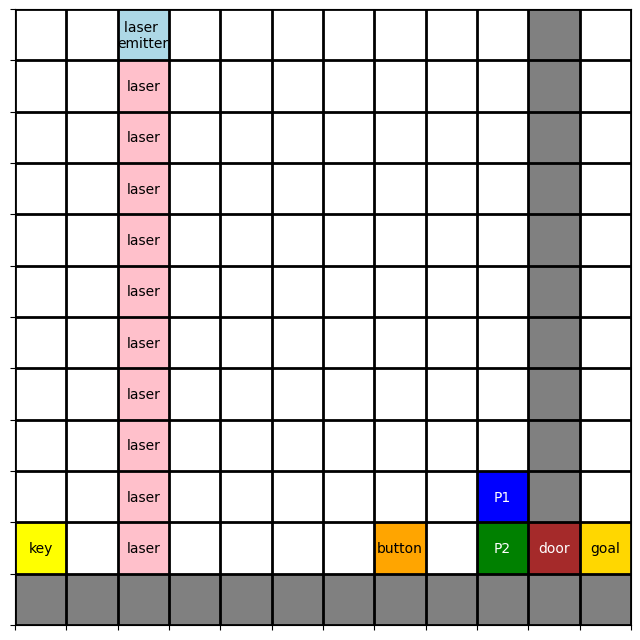

For player B, LLM outcome:

 {
    "move": "jump over right",
    "communication": "I'm going to jump over the laser to reach the button and deactivate it. Once the laser is off, I'll get ready to move forward and collect the key to unlock the door. A, have you deactivated the laser? C and D, keep an eye out for any potential dangers and help us navigate through this."
} 

After player B take the move, here is how the game looks like: 


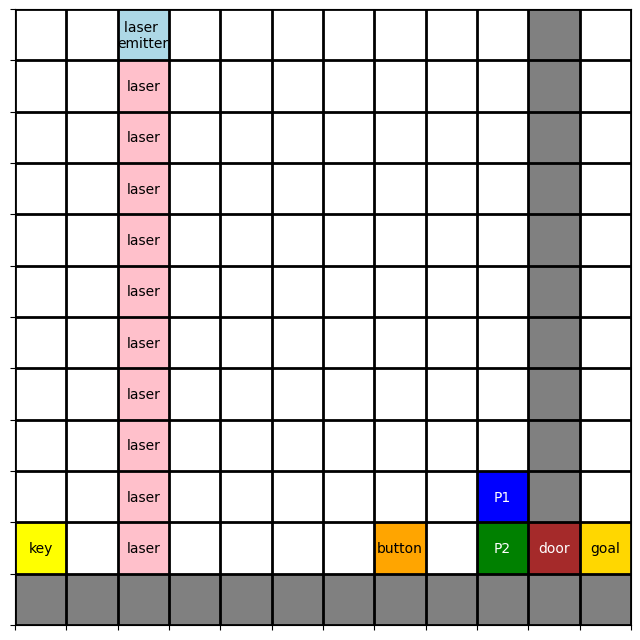

Round: 12, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "jump over right",
  "communication": "Hey team, I'm going to jump over the laser to reach the button. Once I deactivate the laser, we can all safely move to the key and then to the door. Let's coordinate our moves to reach the goal together!"
} 

After player A take the move, here is how the game looks like: 


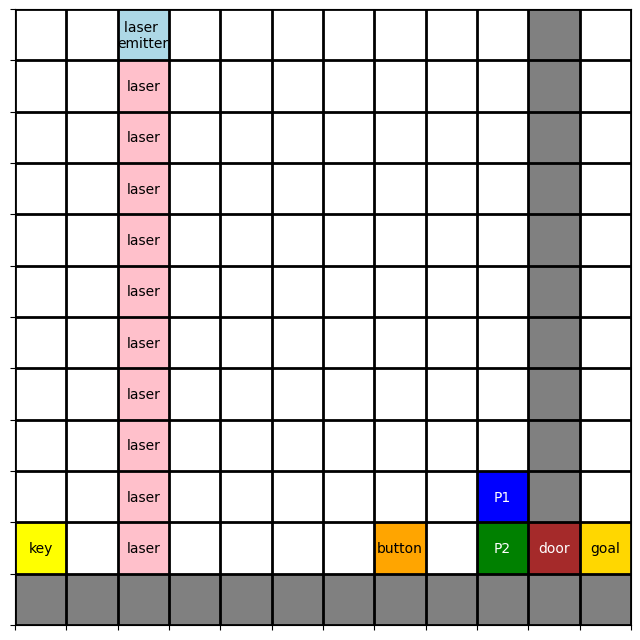

For player B, LLM outcome:

 {
  "move": "move right",
  "communication": "Hey team, I can move right to position myself closer to the key and the door. Let's make sure we coordinate our movements to reach the goal safely. Over to you, Player C!"
} 

After player B take the move, here is how the game looks like: 


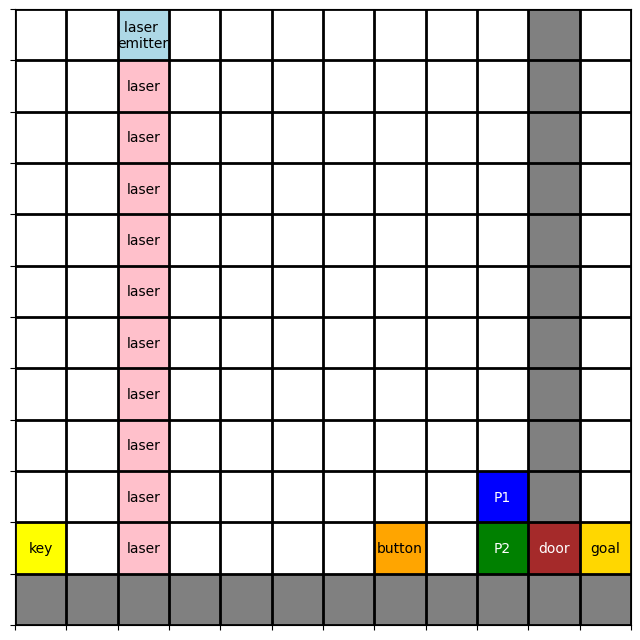

Round: 13, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "jump over right",
  "communication": "A, I'm going to jump over the laser to reach the button. B, can you move towards the key? C, please start moving towards the goal to clear the way for us. With coordinated effort, we can reach the goal together!"
} 

After player A take the move, here is how the game looks like: 


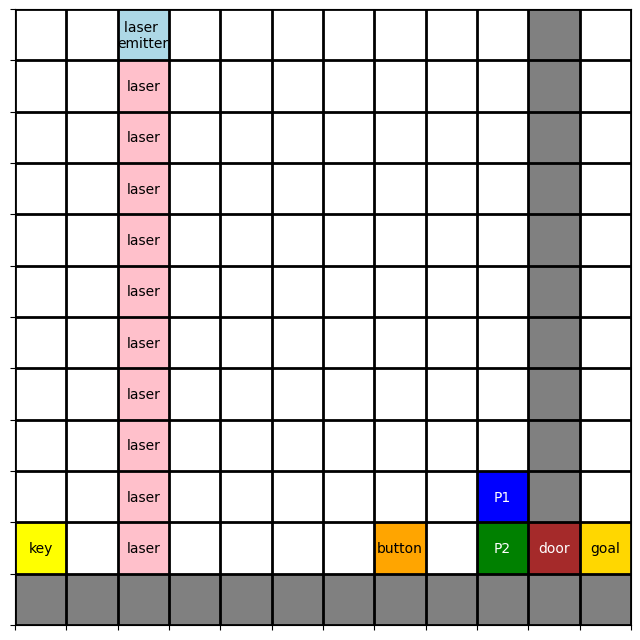

For player B, LLM outcome:

 {
  "move": "right",
  "communication": "I will move towards the key to get it and unlock the door. Once I do that, the path to the goal will be clear for us to reach the goal. Player A, once I unlock the door, you can move towards the goal. Player C, please keep an eye on any lasers that may block our path. We're getting closer to the goal, team!" 
} 

After player B take the move, here is how the game looks like: 


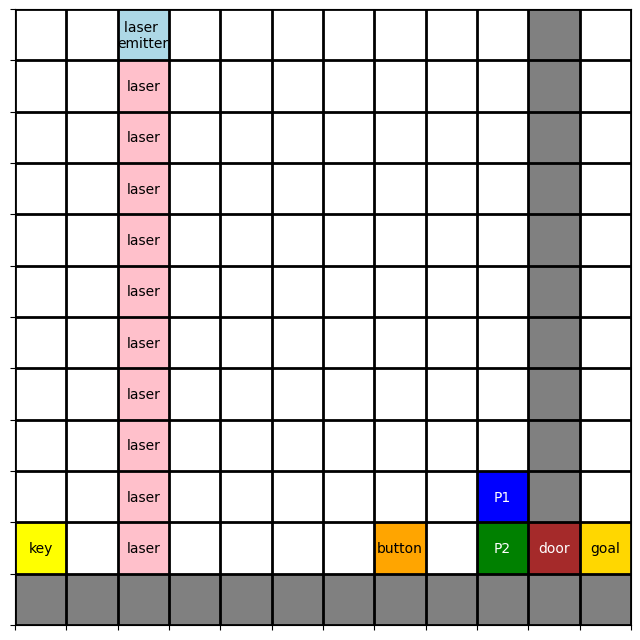

Round: 14, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "right",
  "communication": "I will move to the right to reach the button and deactivate the laser. Player B, make sure you're ready to collect the key once the door is open. We're getting closer to the goal, let's keep coordinating our moves to clear the path for all players."
} 

After player A take the move, here is how the game looks like: 


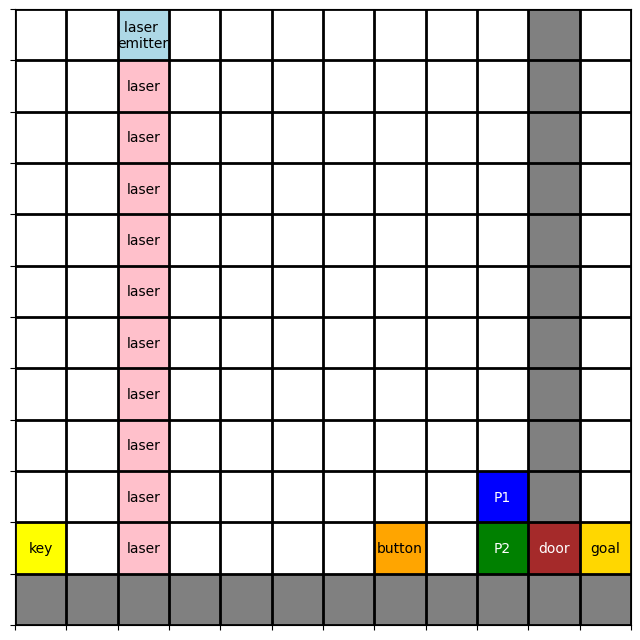

For player B, LLM outcome:

 {
  "move": "move right",
  "communication": "I'm ready to collect the key once the door is open. Let's keep up the good work and continue to coordinate our moves to clear the path for all players."
} 

After player B take the move, here is how the game looks like: 


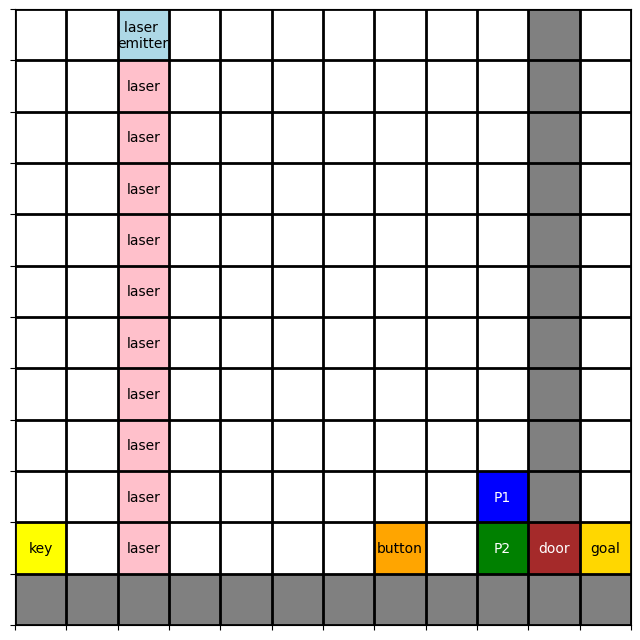

Round: 15, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "jump over right",
  "communication": "Hey team, I see a button 'n' right in front of me. I'm going to jump over to reach it and deactivate the laser. Meanwhile, can someone else grab the key 'k' and get ready to unlock the door? Let's coordinate and clear the path to the goal together!"
} 

After player A take the move, here is how the game looks like: 


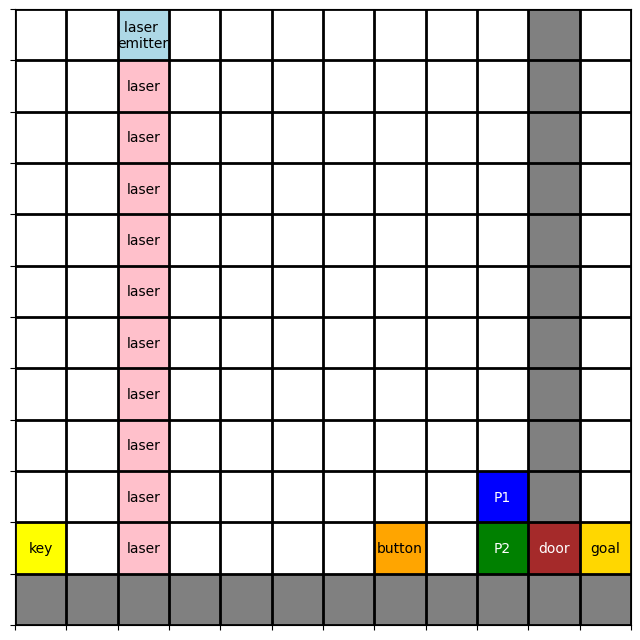

For player B, LLM outcome:

 {
  "move": "move right",
  "communication": "Hey team, I will move right to get closer to the goal. Someone should grab the key 'k' and get ready to unlock the door as soon as I deactivate the laser. Let's coordinate our moves to clear the path and reach the goal together!"
} 

After player B take the move, here is how the game looks like: 


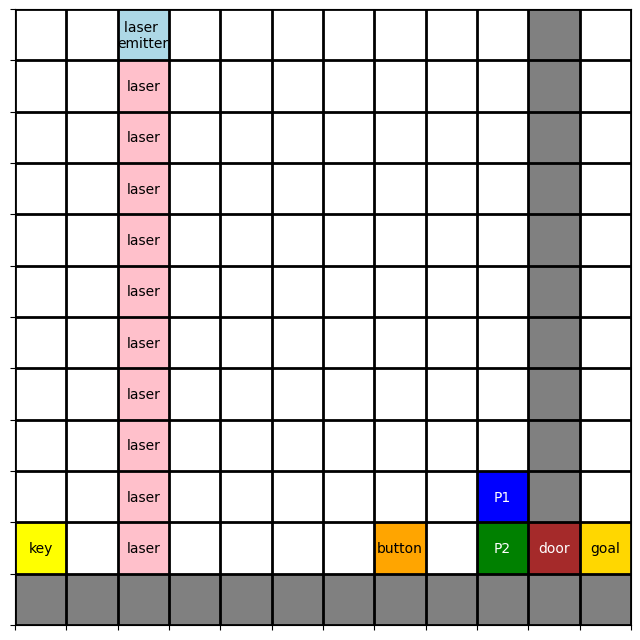

Round: 16, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "jump over right",
  "communication": "Hey team, I need to get to the button to turn off the laser. Once that's off, we can grab the key to unlock the door. Let's coordinate our moves to clear the path to the goal!"
} 

After player A take the move, here is how the game looks like: 


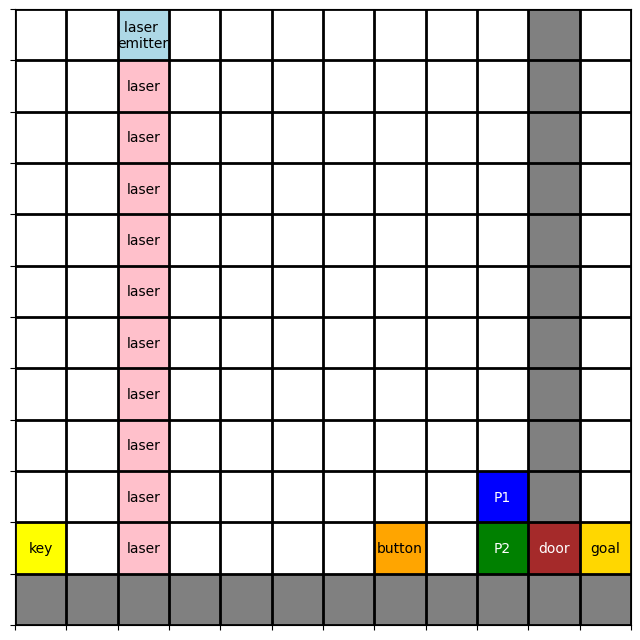

For player B, LLM outcome:

 {
  "move": "jump over right",
  "communication": "Hey team, I'll take the next move and jump over the right to get closer to the button. Once the laser is off, we can plan the next steps to reach the key and the goal."
} 

After player B take the move, here is how the game looks like: 


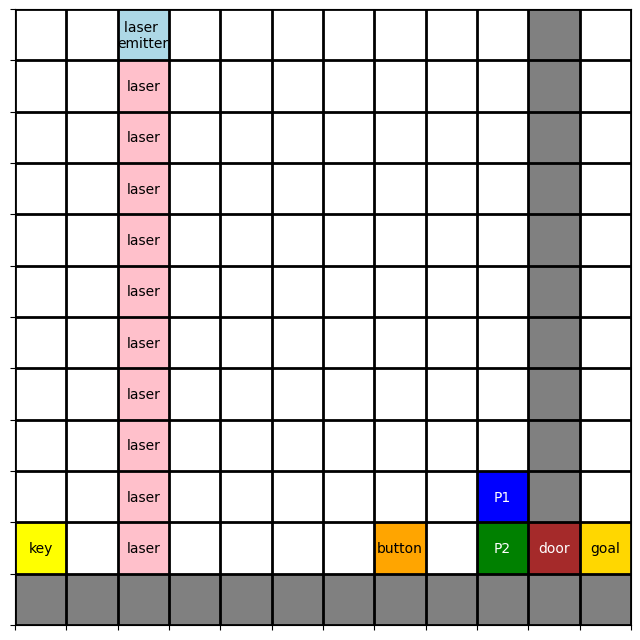

Round: 17, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "move right",
  "communication": "I see a direct path to the goal, but it's blocked by lasers. We need to deactivate the lasers by stepping on the button. Then we should collect the key to unlock the door. Let's try to coordinate our movements and clear the way together."
} 

After player A take the move, here is how the game looks like: 


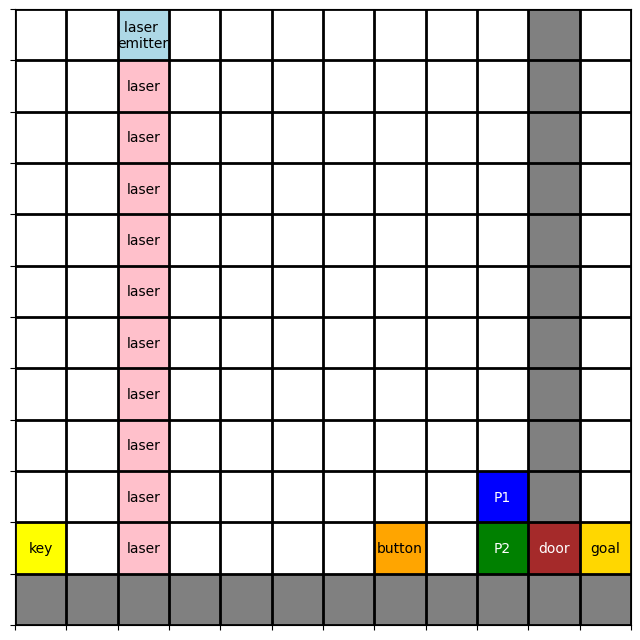

For player B, LLM outcome:

 {
  "move": "jump over right",
  "communication": "I will jump over the laser to reach the button. Once the laser is deactivated, Player A should be able to reach the key and unlock the door. Let's coordinate our movements to clear the path to the goal."
} 

After player B take the move, here is how the game looks like: 


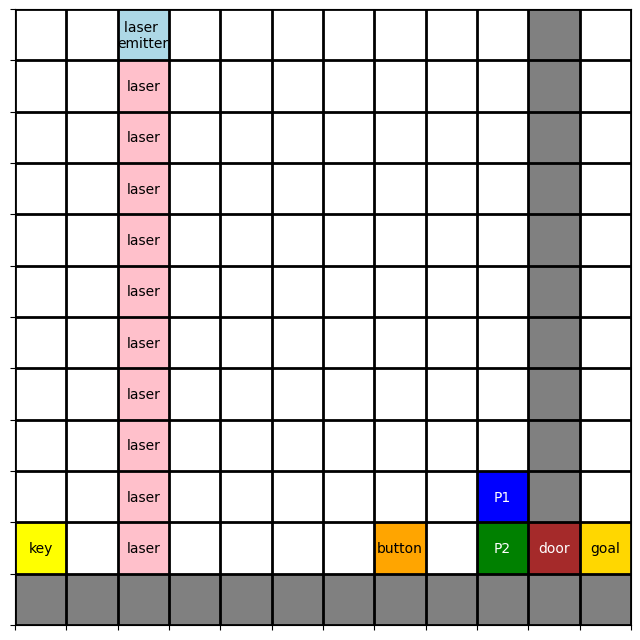

Round: 18, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "jump on right",
  "communication": "I'm going to jump on the button to deactivate the laser. Once the laser is off, we can proceed to get the key and unlock the door. Over." 
} 

After player A take the move, here is how the game looks like: 


KeyboardInterrupt: 

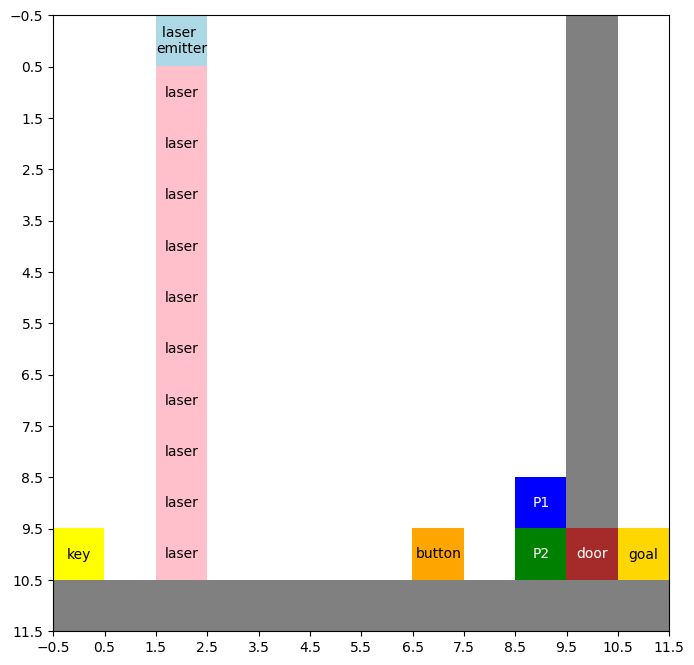

In [7]:
MAX_ROUND = 50
PLAYER_LIST = ['A', 'B', 'C', 'D']  # Max number of players. 
current_round = 1

current_level = level_2.copy()
player_list = [x for x in PLAYER_LIST if x in current_level] # Players in the initial game setup. 
if not player_list:
    print('At least one player(ABCD) should set up in the initial game.')

openai_api_key=os.environ['OPENAI_API_KEY']
prompt = ['test_system_1.txt', 'test_user_1.txt']

print('==================================================================')
print('Before we start, this is how the game looks like. ')
display_level_with_labels(current_level)
moves = []
game_status = 1 # 1: in progress, 0: finished successfully

# If game still in progress, run one round
while (game_status) and (current_round < MAX_ROUND):
    # Initialization
    agent_thoughts = '' 
    actions = {} # collect all action(s) in this round
    player_list = [x for x in player_list if x in current_level]
    print('==================================================================')
    print('Round: {}, Current player list: {}'.format(current_round, player_list))

    for player in player_list:
        outcome = agent_loop(prompt, openai_api_key, current_level, agent_thoughts, player)
        print('For player {}, LLM outcome:'.format(player))
        print('\n {} \n'.format(outcome))
        outcome_dict = eval(outcome)
        actions[player] = outcome_dict['move']
        agent_thoughts += 'Player ' + player + ' said in this turn: ' + outcome_dict['communication']
        # update level
        move = {}
        move[player] = outcome_dict['move']
        current_level = apply_game_updates(current_level, move)
        print('After player {} take the move, here is how the game looks like: '.format(player))
        display_level_with_labels(current_level)  
    moves.append(actions)
    current_round += 1